In [1]:
import io
import re
import numpy as np
import os
import xml.etree.ElementTree as ET 
from joblib import Parallel, delayed
import multiprocessing
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import TextOperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import TextRecognitionMode
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
import requests

import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
def extract_clean_str(original_str):
    return re.sub('[^a-zA-Z0-9]+', ' ', original_str, flags=re.UNICODE).lower().strip().replace(' ', '')

def get_mapped(path):
    key_map, dict_idx = {}, 0
    for r, _, f in os.walk(dir_path):
        for file in f:
            if '.JPG' in file or '.jpg' in file:
                key_map[dict_idx] = file
                dict_idx += 1
    idxs = list(key_map.keys())          
    shuffled_idxs = np.random.randint(0, len(idxs), len(idxs))
    return key_map, shuffled_idxs

def fetch_from_xml(path, file):
    tree = ET.parse(os.path.join(path, file)).getroot()  
    return extract_clean_str(''.join([e.attrib['char'] for e in tree.iter(tag='character')]))

In [17]:
dir_path = 'val2017/'
dict_files, files_idx = get_mapped(dir_path)
shuffled_idx = np.random.randint(0, len(files_idx), len(files_idx))
file =  '000000523957.jpg' #'bw_buildings.png'#dict_files.get(shuffled_idx[65]) #
print (file)
with io.open(os.path.join(dir_path, file), 'rb') as image_file:
    content = (image_file.read())

000000523957.jpg


In [22]:
subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
endpoint = os.environ['COMPUTER_VISION_ENDPOINT']
ocr_url = endpoint + "vision/v2.1/describe"
headers = {'Ocp-Apim-Subscription-Key': subscription_key, 'Content-Type': 'application/octet-stream'}
params = {'maxCandidates': 20} #'language': 'en',
response = requests.post(ocr_url, headers=headers, params=params, data=content)
response.raise_for_status()

In [25]:
txt = response.json()
txt

{'description': {'tags': ['road',
   'outdoor',
   'person',
   'man',
   'trick',
   'grass',
   'riding',
   'doing',
   'board',
   'jumping',
   'young',
   'street',
   'side',
   'hill',
   'ramp',
   'park',
   'air',
   'boy',
   'game',
   'walking',
   'people',
   'standing',
   'hydrant',
   'white'],
  'captions': [{'text': 'a man riding a skateboard up the side of a road',
    'confidence': 0.7505022818004224},
   {'text': 'a man riding a skateboard down the side of a road',
    'confidence': 0.7445956299378497},
   {'text': 'a man riding a skateboard down the side of the road',
    'confidence': 0.7316928463525613},
   {'text': 'a man riding a skateboard up the side of the road',
    'confidence': 0.7306928463525613},
   {'text': 'a man doing a trick on a skateboard',
    'confidence': 0.7079956141611714},
   {'text': 'a man doing a trick on a skateboard on the side of a road',
    'confidence': 0.6763006040633184},
   {'text': 'a young man riding a skateboard down the s

In [27]:
txt['description']['tags']

['road',
 'outdoor',
 'person',
 'man',
 'trick',
 'grass',
 'riding',
 'doing',
 'board',
 'jumping',
 'young',
 'street',
 'side',
 'hill',
 'ramp',
 'park',
 'air',
 'boy',
 'game',
 'walking',
 'people',
 'standing',
 'hydrant',
 'white']

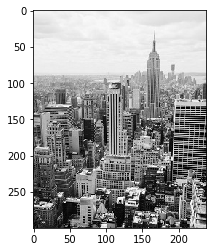

In [10]:
plt.imshow(cv2.imread(os.path.join(dir_path, file)))